In [46]:
df=pd.read_csv("./StudentsPerformance.csv")

In [15]:
import pandas as pd

In [49]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("./StudentsPerformance.csv")

# Display the DataFrame
print(df)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [53]:
df=pd.read_csv("./StudentsPerformance.csv")

In [10]:
import seaborn as sns 

In [11]:
from sklearn.feature_selection import VarianceThreshold


In [12]:
selector = VarianceThreshold(threshold=0.5)

In [54]:
# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Replace NaNs with mean for numerical columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [55]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Replace NaNs with mode for categorical columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [56]:
# Fill missing values in the 'test preparation course' column with the mode
df['test preparation course'] = df['test preparation course'].fillna(df['test preparation course'].mode()[0])


In [57]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return a boolean mask where values are within the bounds
    return (data[col] >= lower_bound) & (data[col] <= upper_bound)

In [59]:
mask_math = remove_outliers_iqr(df, 'math score')
mask_reading = remove_outliers_iqr(df, 'reading score')

In [60]:
mask = mask_math & mask_reading

# Filtered DataFrame without outliers
df_filtered = df[mask].reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_filtered.shape)
print(df_filtered)

Original DataFrame shape: (1000, 8)
DataFrame shape after removing outliers: (988, 8)
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
983  female        group E             master's degree      standard   
984    male        group C                 high school  free/reduced   
985  female        group C                 high school  free/reduced   
986  female        group D                some college      standard   
987  female        group D                some college  free/reduced   

    test preparation course  math score  reading 

In [61]:
# Apply IQR filtering on both columns
mask_math = remove_outliers_iqr(df, 'math score')
mask_reading = remove_outliers_iqr(df, 'reading score')

# Combine masks to keep only rows without outliers in both columns
mask = mask_math & mask_reading

# Filtered DataFrame without outliers
df_filtered = df[mask].reset_index(drop=True)

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_filtered.shape)
print(df_filtered)

Original DataFrame shape: (1000, 8)
DataFrame shape after removing outliers: (988, 8)
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
983  female        group E             master's degree      standard   
984    male        group C                 high school  free/reduced   
985  female        group C                 high school  free/reduced   
986  female        group D                some college      standard   
987  female        group D                some college  free/reduced   

    test preparation course  math score  reading 

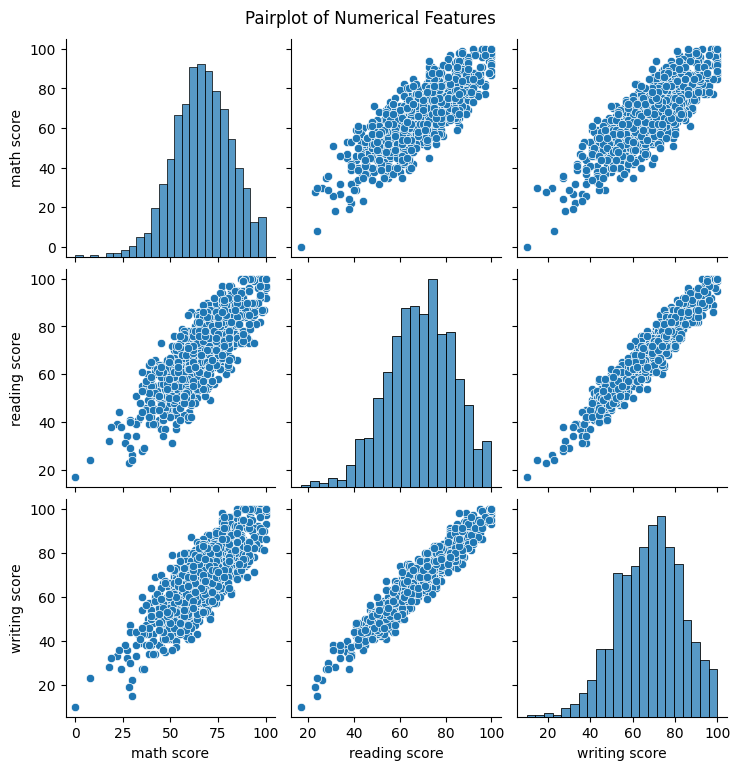

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame

# Select numerical columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Pairplot
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


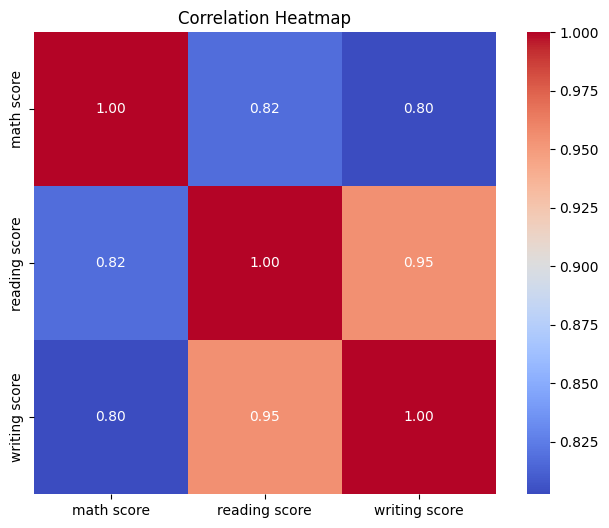

In [63]:
# Calculate correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [64]:
Pairplot shows clear positive correlations between math, reading, and writing scores, indicating students who perform well in one subject tend to do well in others.

Some clusters appear based on categorical features (if added), but numerical variables mostly show linear relationships.

SyntaxError: invalid syntax (3521188572.py, line 1)

In [ ]:
The heatmap confirms strong positive correlations (above 0.7) among math, reading, and writing scores.

No strong negative correlations are observed; the subjects are positively related.

This suggests consistent performance across these academic areas.